**Part-2 (Multiclass Classification):**

In [0]:
#2.1.a) Use the data from the file reduced_mnist.csv in the data directory. Begin by reading the data.
#Print the following information:
#Number of data points
#Total number of features
#Unique labels in the data


import pandas as pd
import matplotlib.pyplot as plt
# import warnings filter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


df = pd.read_csv('reduced_mnist.csv')
m,n=df.shape
#print("Data shape: {}".format(df.shape))
print('The number of records are :',m)
print('The number of columns are :',n)
print('The unique labels in the dataset are ',sorted(df.label.unique()))

print('')
print("""The MNIST dataset contains 2520 records and 785 columns
 * 784 feature columns pixel0 to pixel783
 * 1 label column""")

The number of records are : 2520
The number of columns are : 785
The unique labels in the dataset are  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

The MNIST dataset contains 2520 records and 785 columns
 * 784 feature columns pixel0 to pixel783
 * 1 label column


In [0]:
#2.1 b) Split the data into 70% training data and 30% test data. Fit a One-vs-Rest Classifier (which uses Logistic regression 
#classifier with alpha=1) on training data, and report accuracy, precision, recall on testing data. 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# import warnings filter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

dftrain, dftest = train_test_split(df, test_size=0.3)
features_train=dftrain.iloc[:,1:785]
labels_train=dftrain.iloc[:,0]
features_test=dftest.iloc[:,1:785]
labels_test=dftest.iloc[:,0]
alpha=1

clf = LogisticRegression(random_state=0, multi_class='ovr', C=1/alpha)
ovr_model = clf.fit(features_train, labels_train)

labels_predicted=ovr_model.predict(features_test)

print('Accuracy of One Vs Rest is : '+ str(accuracy_score(labels_test,labels_predicted)))
print('')
print(classification_report(labels_test,labels_predicted,digits=3))

confusion_matrix_ovr = confusion_matrix(labels_test,labels_predicted)
print('Here is the confusion matrix')
print('----------------------------')
print(confusion_matrix_ovr)

Accuracy of One Vs Rest is : 0.83994708994709

              precision    recall  f1-score   support

           0      0.862     0.938     0.898        80
           1      0.950     0.970     0.960        99
           2      0.833     0.783     0.807        83
           3      0.812     0.757     0.783        74
           4      0.867     0.844     0.855        77
           5      0.746     0.794     0.769        63
           6      0.840     0.913     0.875        69
           7      0.863     0.863     0.863        73
           8      0.726     0.692     0.709        65
           9      0.826     0.781     0.803        73

   micro avg      0.840     0.840     0.840       756
   macro avg      0.833     0.833     0.832       756
weighted avg      0.839     0.840     0.839       756

Here is the confusion matrix
----------------------------
[[75  1  1  1  0  0  1  0  1  0]
 [ 0 96  0  0  0  1  0  0  2  0]
 [ 3  0 65  2  0  0  8  1  3  1]
 [ 1  0  4 56  1  8  1  0  3  0]
 [ 0

We are going to use P as f1-score since fID= 1
For alpha value : 0.1 we got an average f1-score on trainining set: [1.]
For alpha value : 0.1 we got an average f1-score on validation set: [0.84]

For alpha value : 1 we got an average f1-score on trainining set: [1.]
For alpha value : 1 we got an average f1-score on validation set: [0.84]

For alpha value : 3 we got an average f1-score on trainining set: [1.]
For alpha value : 3 we got an average f1-score on validation set: [0.84]

For alpha value : 10 we got an average f1-score on trainining set: [1.]
For alpha value : 10 we got an average f1-score on validation set: [0.84]

For alpha value : 33 we got an average f1-score on trainining set: [1.]
For alpha value : 33 we got an average f1-score on validation set: [0.84]

For alpha value : 100 we got an average f1-score on trainining set: [1.]
For alpha value : 100 we got an average f1-score on validation set: [0.84]

For alpha value : 333 we got an average f1-score on trainining set: [1.

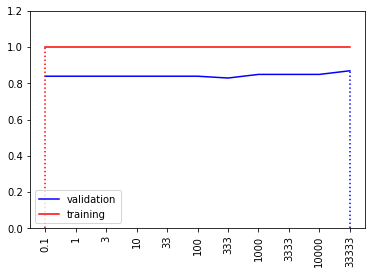

In [0]:
#2.2 Choosing the best hyper-parameter 
#a) - Choose the best value of alpha from the set a={0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333} by observing average training and validation performance P.
#On a graph, plot both the average training performance (in red) and average validation performacne (in blue) w.r.t. each hyperparameter value.
#Comment on this graph by identifying regions of overfitting and underfitting.
#Print the best value of alpha hyperparameter

# import warnings filter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

def runLROVRmodel(trials, data, penalty_score):

   model_acc     = 0
   final_f1score_train = np.zeros([1,1])
   final_f1score_val = np.zeros([1,1]) # storing model weights
    
   for i in range(0,trials):
       Dtrain, Dtest = train_test_split(data, test_size=0.3)
       Xtrain = Dtrain.iloc[:,1:785].copy()
       ytrain = Dtrain.iloc[:,0].copy()
       Xtest = Dtest.iloc[:,1:785].copy()
       ytest = Dtest.iloc[:,0].copy()
    
       lr = LogisticRegression(C=1/penalty_score, random_state=0, multi_class='ovr')
       lr.fit(Xtrain, ytrain)
       
       y_predict_train = lr.predict(Xtrain)
       f1score_train=f1_score(ytrain, y_predict_train, average='weighted')  
       final_f1score_train  +=  f1score_train
    
       y_predict_val = lr.predict(Xtest)
       f1score_val=f1_score(ytest, y_predict_val, average='weighted')
       final_f1score_val  +=  f1score_val
   
   final_f1score_train /= trials
   final_f1score_val /= trials
   return np.round(final_f1score_train, decimals=2),np.round(final_f1score_val, decimals=2)

print('We are going to use P as f1-score since fID=',218545396%3)

alpha_vals = [0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333]
acc_train = np.zeros((len(alpha_vals),1))
acc_val = np.zeros((len(alpha_vals),1))
index = 0

for l in alpha_vals:
   acc_train[index], acc_val[index] = runLROVRmodel(10, dftrain, np.float(l))
   print('For alpha value :', l,'we got an average f1-score on trainining set:', acc_train[index])
   print('For alpha value :', l,'we got an average f1-score on validation set:', acc_val[index]) 
   print('')
   index += 1
   
# penalty at which validation accuracy is maximum
max_index_t  = np.argmax(acc_train[:,0])
max_index_v  = np.argmax(acc_val[:,0])
best_alpha_t = alpha_vals[max_index_t]
best_alpha_v = alpha_vals[max_index_v]
print("")
print("""We have performed 10 random splits of training data into training (70%) and validation (30%) set.
We then used these 10 sets of data to find the average validation performance P for both training sets and validation set
which is the f1 score in our case.

Best Alpha for training set gave maximum F1 score is: {}""".format(best_alpha_t))
print("""Best Alpha for validation that gave maximum F1 score is: {}""".format(best_alpha_v))

#plot the accuracy curve
plt.plot(range(0,len(alpha_vals)), acc_val[:,0], color='b', label='validation')
plt.plot(range(0,len(alpha_vals)), acc_train[:,0], color='r', label='training')
#replace the x-axis labels with penalty values
plt.xticks(range(0,len(alpha_vals)), alpha_vals, rotation='vertical')

#Highlight the best values of alpha and lambda
plt.plot((max_index_v, max_index_v), (0, acc_val[max_index_v]), ls='dotted', color='b')
plt.plot((max_index_t, max_index_t), (0, acc_train[max_index_t]), ls='dotted', color='r')

#Set the y-axis from 0 to 1.0
axes = plt.gca()
axes.set_ylim([0, 1.2])

plt.legend(loc="lower left")
plt.show()

In [0]:
#2.2b)Use the best alpha and all training data to build the final model and then evaluate the prediction performance 
#on test data and report the following: 
# a)The confusion matrix
# b)Precision, recall and accuracy for each class.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# import warnings filter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

alpha=best_alpha_v

clf = LogisticRegression(random_state=0, multi_class='ovr', C=1/alpha)
ovr_model = clf.fit(features_train, labels_train)

labels_predicted=ovr_model.predict(features_test)

print('Accuracy of One Vs Rest is : '+ str(accuracy_score(labels_test,labels_predicted)))
print('')
print(classification_report(labels_test,labels_predicted,digits=3))

confusion_matrix_ovr = confusion_matrix(labels_test,labels_predicted)
print('Here is the confusion matrix')
print('----------------------------')
print(confusion_matrix_ovr)

Accuracy of One Vs Rest is : 0.873015873015873

              precision    recall  f1-score   support

           0      0.882     0.938     0.909        80
           1      0.960     0.970     0.965        99
           2      0.896     0.831     0.862        83
           3      0.831     0.797     0.814        74
           4      0.872     0.883     0.877        77
           5      0.828     0.841     0.835        63
           6      0.890     0.942     0.915        69
           7      0.901     0.877     0.889        73
           8      0.825     0.800     0.812        65
           9      0.797     0.808     0.803        73

   micro avg      0.873     0.873     0.873       756
   macro avg      0.868     0.869     0.868       756
weighted avg      0.873     0.873     0.873       756

Here is the confusion matrix
----------------------------
[[75  1  1  2  0  0  1  0  0  0]
 [ 0 96  0  1  0  0  0  0  2  0]
 [ 1  0 69  1  1  1  6  0  3  1]
 [ 2  0  4 59  1  5  0  0  3  0]
 [ 

2.2b) Discuss if there is any sign of underfitting or overfitting with appropriate reasoning.

There are no signs of over-fitting or under-fitting demostrated by this model.
We could say this because the training set is showing good performance of 100% accuracy and the testing set also shows a good generalization of about 87%.